<a href="https://colab.research.google.com/github/toliyang/AI_ML/blob/main/S_06/polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polynomial Regression

## Importing the libraries

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the dataset

In [16]:
# use url as the file path
fp = 'https://raw.githubusercontent.com/toliyang/AI_ML/refs/heads/main/S_06/Position_Salaries.csv'
dataset = pd.read_csv(fp)
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

## Training the Linear Regression model on the whole dataset

In [17]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

## Training the Polynomial Regression model on the whole dataset

In [40]:
# poly degree
dgr = 5

def X_poly(dgr: int,X):
  from sklearn.preprocessing import PolynomialFeatures
  X_poly_prep = PolynomialFeatures(degree = dgr)
  X_poly = X_poly_prep.fit_transform(X)

  return X_poly

lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly(dgr,X), y)

print(X, X_poly(dgr,X), sep='\n')


[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[[1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00]
 [1.0000e+00 2.0000e+00 4.0000e+00 8.0000e+00 1.6000e+01 3.2000e+01]
 [1.0000e+00 3.0000e+00 9.0000e+00 2.7000e+01 8.1000e+01 2.4300e+02]
 [1.0000e+00 4.0000e+00 1.6000e+01 6.4000e+01 2.5600e+02 1.0240e+03]
 [1.0000e+00 5.0000e+00 2.5000e+01 1.2500e+02 6.2500e+02 3.1250e+03]
 [1.0000e+00 6.0000e+00 3.6000e+01 2.1600e+02 1.2960e+03 7.7760e+03]
 [1.0000e+00 7.0000e+00 4.9000e+01 3.4300e+02 2.4010e+03 1.6807e+04]
 [1.0000e+00 8.0000e+00 6.4000e+01 5.1200e+02 4.0960e+03 3.2768e+04]
 [1.0000e+00 9.0000e+00 8.1000e+01 7.2900e+02 6.5610e+03 5.9049e+04]
 [1.0000e+00 1.0000e+01 1.0000e+02 1.0000e+03 1.0000e+04 1.0000e+05]]


## Visualising the Linear Regression results

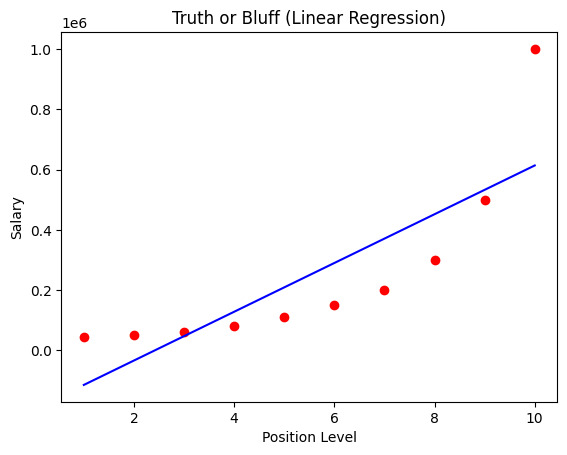

In [19]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Visualising the Polynomial Regression results

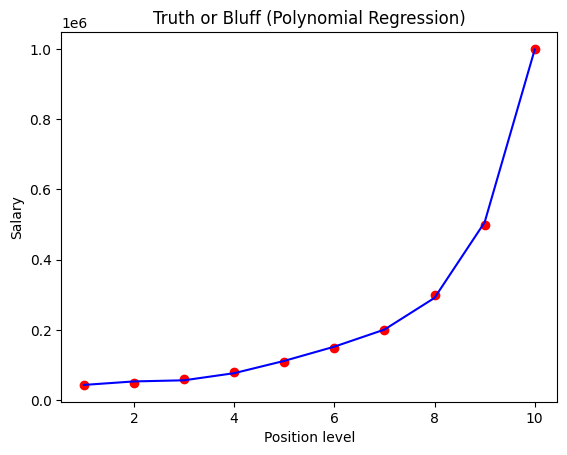

In [25]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(X_poly(dgr,X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Visualising the Polynomial Regression results (for higher resolution and smoother curve)

/tmp/ipython-input-34-3973904014.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


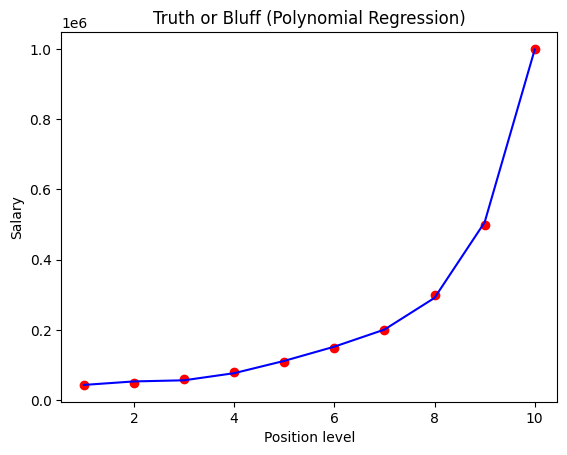

In [34]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(X_poly(dgr,X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Predicting a new result with Linear Regression

In [27]:
lin_reg.predict([[6.5]])

array([330378.78787879])

## Predicting a new result with Polynomial Regression

In [32]:
lin_reg_2.predict(X_poly(dgr, [[6.5]]))

array([174878.07765173])